# Problem 3: Food Truck Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def time_elapsed(start_time, end_time):
    def time_to_sec(time):
        hour, minute = time.split(":")
        minute, PM = minute.split(" ")
        minute, hour = int(minute), int(hour)
        if hour > 12 and (not(hour == 12 and minute == 0)):
            hour += 12
        return hour * 60 + minute
    return time_to_sec(end_time) - time_to_sec(start_time)

def generate_arrivals(rate, time_elapsed):
    arrival_time = []
    arrival_diff = []
    while (len(arrival_diff)==0 or (arrival_time[-1] < time_elapsed)):
        next_arrival = np.random.poisson(rate)
        arrival_time.append(sum(arrival_time) + next_arrival)
        arrival_diff.append(next_arrival)
    return arrival_time, arrival_diff

a.) Denote $E_i$ as the number of customers that arrive at the food truck between 11:55 AM and 12:05 PM on the $i$-th day. Do the following:

> i.) Compute $\frac{1}{100} \sum_{i=1}^{100} E_i$ and compute the sample variance for $\mathbb{E}_i$'s.

In [3]:
arrivals_count = []
arrivals_over = []
total_time = time_elapsed("11:55 AM", "12:05 PM")

for _ in range(100):
    arrival_times, arrival_diffs = generate_arrivals(rate=2, time_elapsed=total_time)
    arrivals_count.append(len(arrival_times))
    arrivals_over.append(sum([arrival > 1 for arrival in arrival_diffs]))
# 1/100 * sum of E_i is simply the mean
arrival_mean = np.mean(arrivals_count) 

# Variance is standard deviation squared
arrival_var = np.std(arrivals_count) ** 2

print(f"Sample Mean of E_i: {arrival_mean}\nSample Variance of E_i: {round(arrival_var, 4)}")

Sample Mean of E_i: 3.83
Sample Variance of E_i: 0.5611


> ii.) Histogram

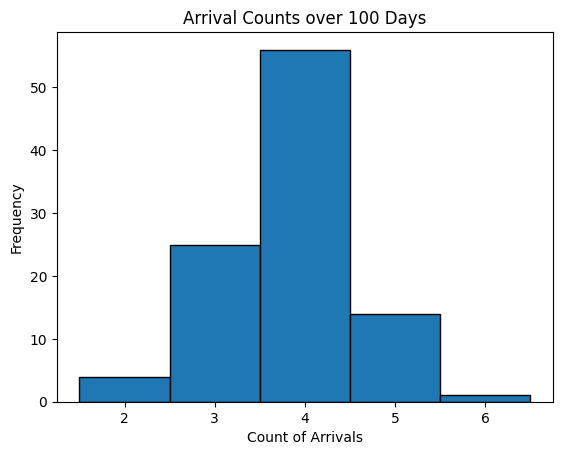

In [4]:
bin_range = np.arange(min(arrivals_count), max(arrivals_count) + 2) - 0.5

plt.figure()
plt.title("Arrival Counts over 100 Days")
plt.hist(arrivals_count, bins=bin_range, align="mid", edgecolor = "black")
plt.xlabel("Count of Arrivals")
plt.ylabel("Frequency")
plt.show()

> iii.) Inter-arrival times over 100 days, proportion > 1 minute, & comparison to $e^{-2}$

Proportion Longer than 1 minute

In [5]:
prop_over_1_min = sum(arrivals_over) / sum(arrivals_count) 
print(f"{prop_over_1_min:.4f} of all inter-arrival times were over a minute.")

0.5979 of all inter-arrival times were over a minute.


$X_{k, i}$ = Arrival of customer $k$ on day $i$ ~ $\text{Poisson}(\lambda = 2)$

$$
\begin{align*}
P(X_{k, i} > 1) &= 1 - P(X_{k, i} \leq 1)=1 - (P(X_{k, i} = 0) + P(X_{k, i} = 1))
\\
&= 1 - (\frac{2^{(0)} e^{-2}}{(0)!} + \frac{2^{(1)} e^{-2}}{(1)!}) = 1 - 3e^{-2}
\\ &\approx 0.594
\end{align*}
$$

Based on CLT, we should see some convergence towards this number, which we see our sample proportion of 0.5979 being sort of close to 0.594, with the relationship of the proportion inter-arrival times longer than a minute in comparison to $e^{-2}$ being $1 - 3e^{-2}$.